# Liver Disease

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [65]:
liv_df = pd.read_csv(r'C:\Desktop1\Shwetha V\RiskHealthBoard_Project\indian_liver_patient.csv')
liv_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,7.3,2.4,0.40,1


In [66]:
liv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset                     583 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


In [67]:
liv_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,7.200000,3.800000,1.100000,2.000000


Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


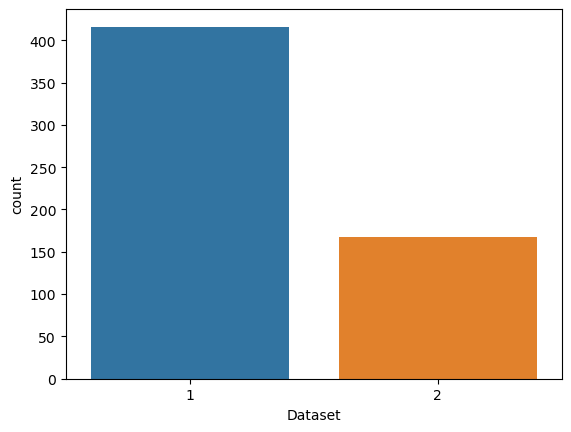

In [68]:
sns.countplot(data=liv_df, x = 'Dataset', label='Count')
LD, NLD = liv_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


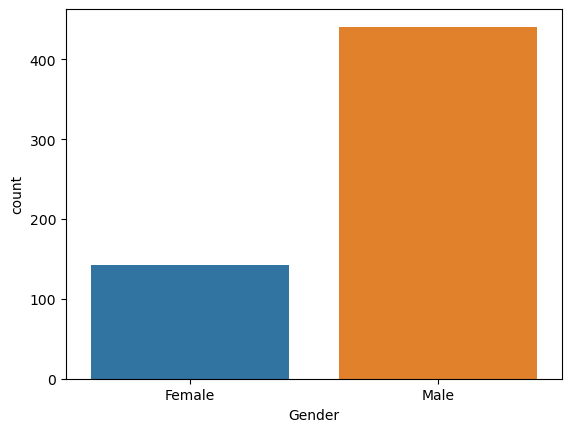

In [69]:
sns.countplot(data=liv_df, x = 'Gender', label='Count')
M, F = liv_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [70]:
liv_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


In [71]:
liv_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


Text(0.5, 0.98, 'Disease by Gender and Age')

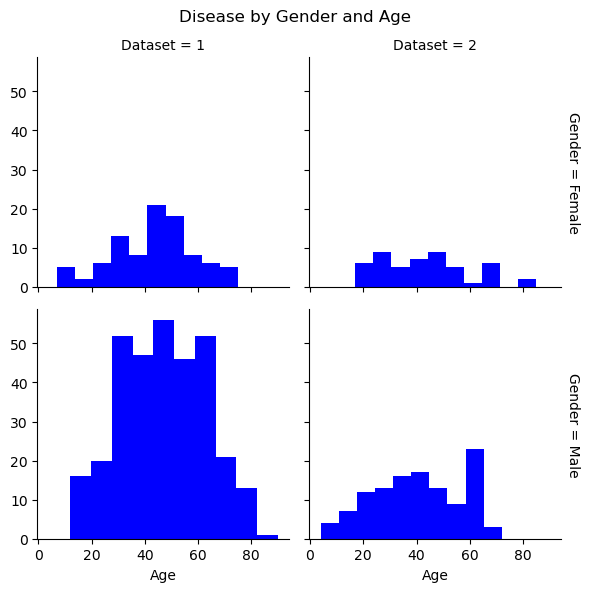

In [72]:
g = sns.FacetGrid(liv_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="blue")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

In [73]:
liv_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [74]:
liv_df[liv_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,8.5,4.8,NaN,2


In [75]:
liv_df["Albumin_and_Globulin_Ratio"] = liv_df.Albumin_and_Globulin_Ratio.fillna(liv_df['Albumin_and_Globulin_Ratio'].mean())

In [76]:
from sklearn.model_selection import train_test_split
X = liv_df.drop(['Age','Gender','Dataset'], axis=1)
y = liv_df['Dataset'] # 1 for liver disease; 2 for no liver disease

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [78]:
scoring = 'accuracy'

Text(0.5, 1.0, 'Correlation between features')

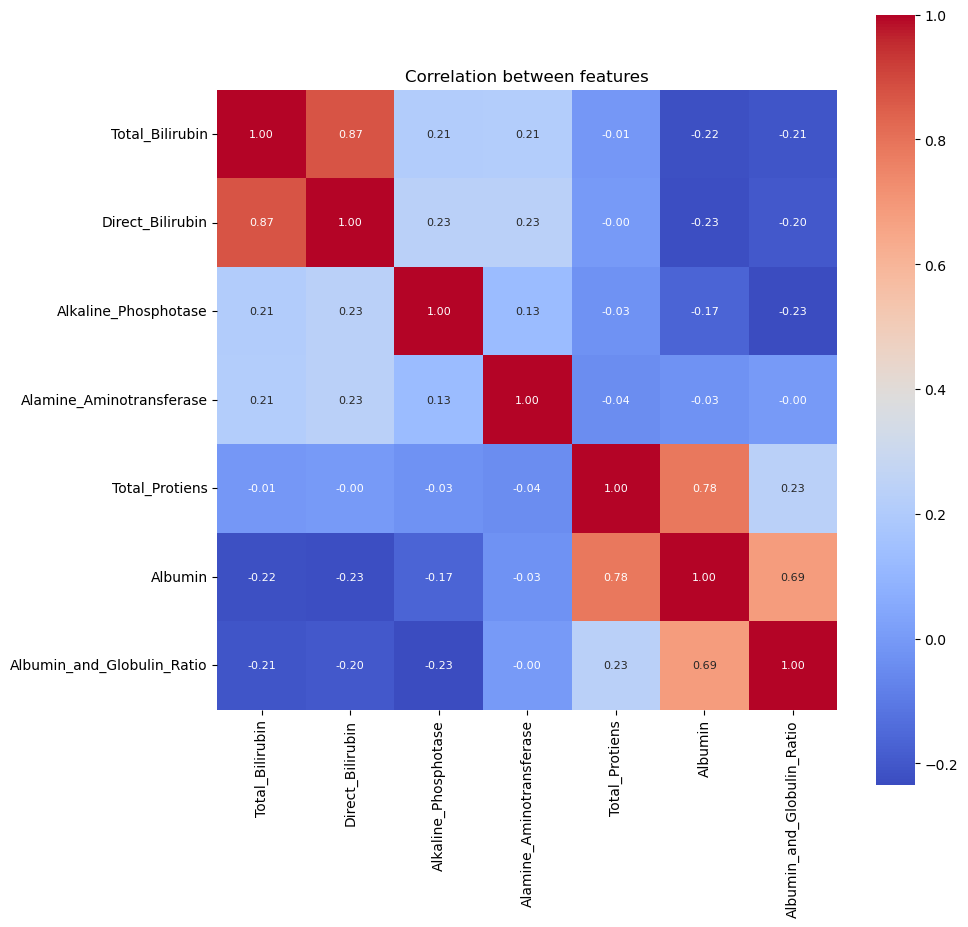

In [79]:
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           cmap= 'coolwarm')
plt.title('Correlation between features')

In [80]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LOG', LogisticRegression()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model:Mean accuracy is 0.634878 (Std accuracy is 0.064642)
For SVM Model:Mean accuracy is 0.705976 (Std accuracy is 0.057264)
For NB Model:Mean accuracy is 0.538902 (Std accuracy is 0.067050)
For KNN Model:Mean accuracy is 0.654573 (Std accuracy is 0.074413)
For LOG Model:Mean accuracy is 0.703415 (Std accuracy is 0.054171)


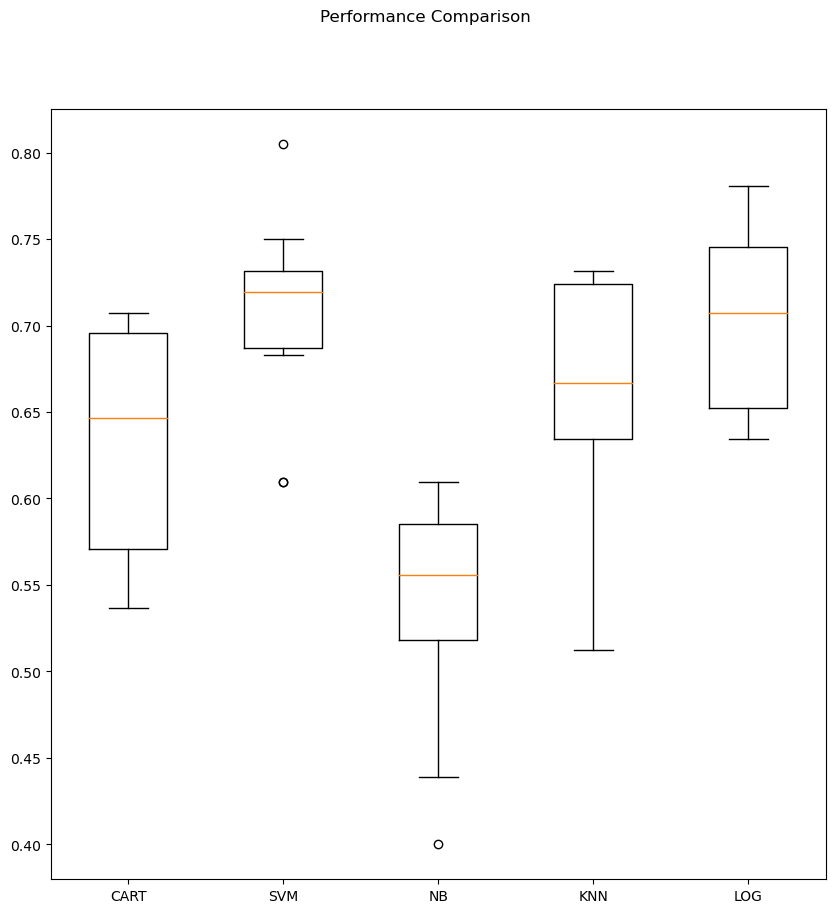

In [81]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [82]:
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(y_test, predictions))
    print("Classification report:\n",classification_report(y_test, predictions))


Model: CART
Accuracy score: 0.68
Classification report:
               precision    recall  f1-score   support

           1       0.78      0.79      0.78       128
           2       0.40      0.38      0.39        47

    accuracy                           0.68       175
   macro avg       0.59      0.59      0.59       175
weighted avg       0.68      0.68      0.68       175


Model: SVM
Accuracy score: 0.7314285714285714
Classification report:
               precision    recall  f1-score   support

           1       0.73      1.00      0.84       128
           2       0.00      0.00      0.00        47

    accuracy                           0.73       175
   macro avg       0.37      0.50      0.42       175
weighted avg       0.53      0.73      0.62       175


Model: NB
Accuracy score: 0.5657142857142857
Classification report:
               precision    recall  f1-score   support

           1       0.98      0.41      0.58       128
           2       0.38      0.98     

In [83]:
svm = SVC()

svm.fit(X_train, y_train)

svm_score = round(svm.score(X_train, y_train) * 100, 2)
svm_score_test = round(svm.score(X_test, y_test) * 100, 2)
print('Support Vector Classifier Training Score: \n', svm_score)
print('Support Vector Classifier Test Score: \n', svm_score_test)

predict = svm.predict(X_test)
predict

Support Vector Classifier Training Score: 
 70.59
Support Vector Classifier Test Score: 
 73.14


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [84]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)

predict = logreg.predict(X_test)
predict

Logistic Regression Training Score: 
 71.81
Logistic Regression Test Score: 
 72.57


array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1],
      dtype=int64)

In [85]:
models = pd.DataFrame({
    'Model': [ 'SVC','Logistic Regression'],
    'Score': [svm_score ,logreg_score],
    'Test Score': [ svm_score_test,logreg_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
0,SVC,70.59,73.14
1,Logistic Regression,71.81,72.57


In [86]:
import pickle
pickle.dump(svm, open('liver_model.pkl','wb'))

liver1 = pickle.load(open('liver_model.pkl','rb'))